### ECG Signal Classification (5 classes) 
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data

In [3]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [4]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [5]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

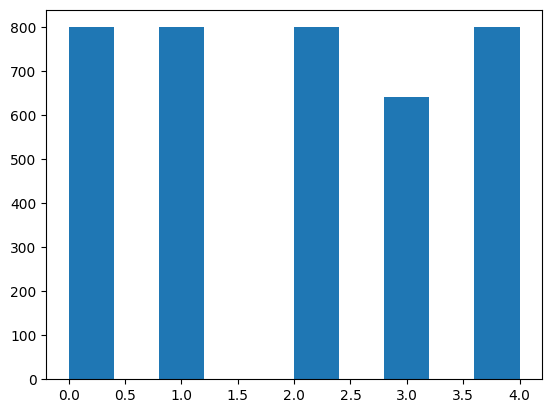

In [6]:
plt.hist(Y)

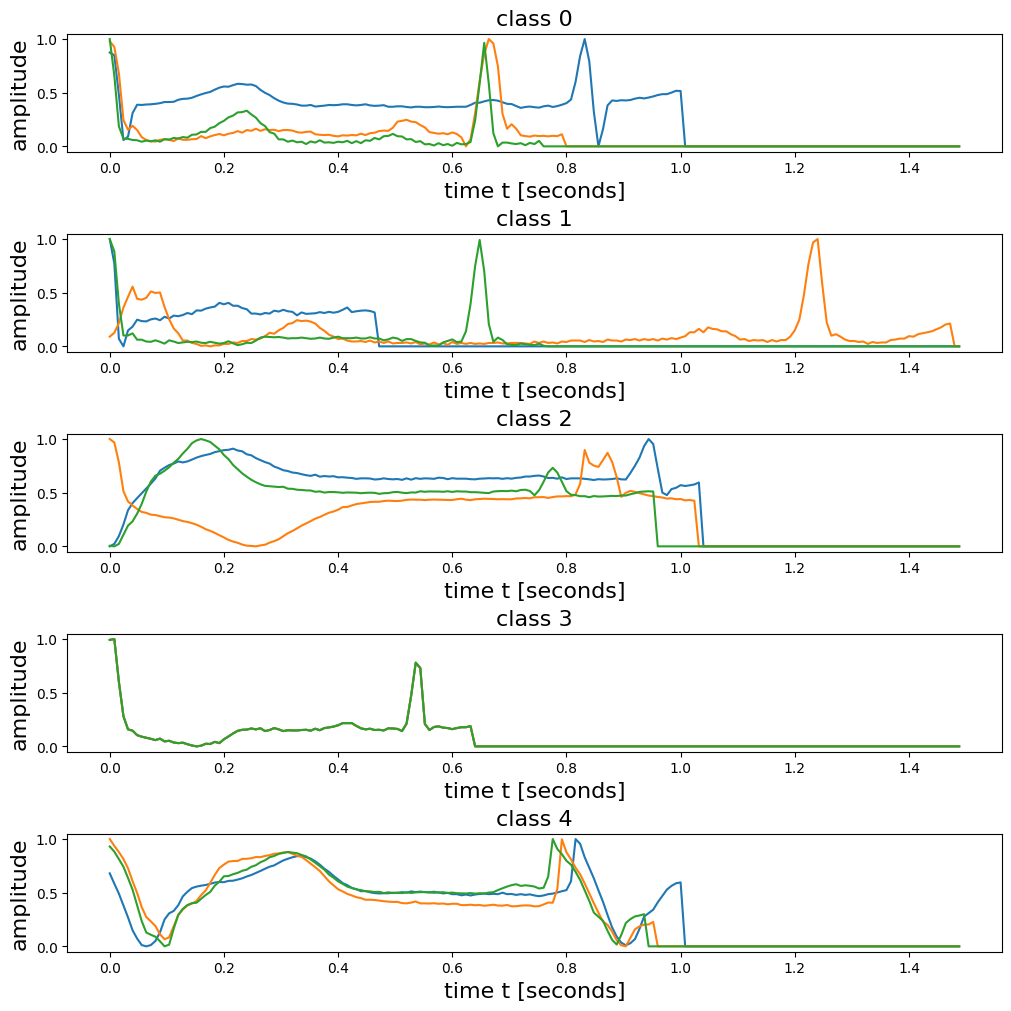

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 0)

In [9]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(3072, 187)

In [10]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [11]:
Y_train.shape

(3072,)

In [12]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [13]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [14]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [15]:
Y_test.shape

(769,)

In [16]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

Build KNN Classifier and Find Optimal Neighbors

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
vals = []
for x in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors = x)
    # train the KNN regressor
    knn.fit(X_train, Y_train)
    #Compare Scores
    print(x, ':     ', knn.score(X_validation, Y_validation))
    vals.append(knn.score(X_validation, Y_validation))

max_score = max(vals)
print('Optimal neighbors is ', vals.index(max_score)*10 + 1)

knn1 = KNeighborsClassifier(n_neighbors = vals.index(max_score)*10 + 1)
knn1.fit(X_train, Y_train)
knn_train = knn1.score(X_train, Y_train)
knn_test = knn1.score(X_test, Y_test)

1 :      0.8268229166666666
11 :      0.78125
21 :      0.7591145833333334
31 :      0.7473958333333334
41 :      0.7252604166666666
51 :      0.7135416666666666
61 :      0.6979166666666666
71 :      0.7044270833333334
81 :      0.69140625
91 :      0.6861979166666666
Optimal neighbors is  1


Build Logistic Only

In [122]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(fit_intercept = True, max_iter = 10000)

In [123]:
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [124]:
lm_test = logistic_model.score(X_test, Y_test)
lm_train = logistic_model.score(X_train, Y_train)

Build DecisionTreeClassifier and find optimal depth

In [128]:
from sklearn.tree import DecisionTreeClassifier
vals1 = []
for x in range(1,100,10):
    dt = DecisionTreeClassifier(max_depth = x, random_state = 0)
    # train the KNN regressor
    dt.fit(X_train, Y_train)
    #Compare Scores
    print(x, ':     ', dt.score(X_validation, Y_validation))
    vals1.append(dt.score(X_validation, Y_validation))

max_score1 = max(vals1)
print('Optimal depth is ', vals1.index(max_score1)*10 + 1)

dtree1 = DecisionTreeClassifier(max_depth= vals1.index(max_score1)*10 + 1)
dtree1.fit(X_train, Y_train)
dt_train = dtree1.score(X_train, Y_train)
dt_test = dtree1.score(X_test, Y_test)

1 :      0.3502604166666667
11 :      0.7734375
21 :      0.7786458333333334
31 :      0.7786458333333334
41 :      0.7786458333333334
51 :      0.7786458333333334
61 :      0.7786458333333334
71 :      0.7786458333333334
81 :      0.7786458333333334
91 :      0.7786458333333334
Optimal depth is  21


Build RandomForestClassifier and find optimal depth

In [126]:
from sklearn.ensemble import RandomForestClassifier
vals2 = []
for x in range(1, 100, 10):
    rf = RandomForestClassifier(max_depth = x, random_state = 0)
    # train the KNN regressor
    rf.fit(X_train, Y_train)
    #Compare Scores
    print(x, ':     ', rf.score(X_validation, Y_validation))
    vals2.append(rf.score(X_validation, Y_validation))

max_score2 = max(vals2)
print('Optimal depth is ', vals2.index(max_score2)*10 + 1)

rf1 = RandomForestClassifier(max_depth = vals2.index(max_score2)*10 + 1)
rf1.fit(X_train, Y_train)
rf_train = rf1.score(X_train, Y_train)
rf_test = rf1.score(X_test, Y_test)


1 :      0.4947916666666667
11 :      0.84765625
21 :      0.8567708333333334
31 :      0.86328125
41 :      0.86328125
51 :      0.86328125
61 :      0.86328125
71 :      0.86328125
81 :      0.86328125
91 :      0.86328125
Optimal depth is  31


Report in a Table

In [127]:
dict = {'KNN': [knn_train, knn_test], 
        'LogisticRegression': [lm_train, lm_test],
        'DecisionTreeClassifier':[dt_train, dt_test],
        'RandomForestClassifier':[rf_train, rf_test]}

results = pd.DataFrame(dict, index = ['training accuracy', 'test accuracy'])
results

,KNN,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
training accuracy,1.000000,0.776042,1.000000,1.000000
test accuracy,0.876463,0.751625,0.820546,0.897269
